In [1]:
# Importing necessary libraries
import numpy as np, pandas as pd

import matplotlib.pyplot as plt, seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn import metrics
from sklearn.metrics import precision_score, recall_score

import warnings
warnings.filterwarnings('ignore')

### Reading and Understanding the Data

In [2]:
# Reading and displaying the top 5 records.
pd.set_option('display.max_columns', 100)
lead_df = pd.read_csv('Leads.csv')
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
# No. of records and attributes present
lead_df.shape

(9240, 37)

In [4]:
# Checking the data info.
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
# Describe the data
lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Data Cleaning

In [6]:
# replace the 'select' with Other for Specialization
lead_df.Specialization.replace('Select',value = 'Unemployed', inplace =True)

# replace the 'select' with nan values
lead_df.replace('Select', value = np.nan, inplace = True)

lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Unemployed,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Unemployed,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Unemployed,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [7]:
# check high % of null values in columns
round(lead_df.isnull().sum()/len(lead_df)  * 100,0)

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   16.0
How did you hear about X Education               78.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article           

In [8]:
# Dropping columns with high % of null values ( > 45%)
lead_df.drop(['How did you hear about X Education','Lead Quality','Lead Profile','Asymmetrique Activity Index',
              'Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score'], axis = 1, inplace = True)

lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Unemployed,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,No,No,NaN,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Unemployed,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,NaN,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Unemployed,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


In [9]:
#checking categorical data
cat_data = lead_df.select_dtypes(exclude = ['int', 'int64', 'float']).columns
cat_data

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [10]:
# Finding highly skewed columns
for i in cat_data:
    print(lead_df[i].value_counts()/lead_df.shape[0] * 100)

9ce91c14-831b-42d9-a481-795f29c9096f    0.010823
b2dfb7a5-814d-465b-816e-63d6b3a863ca    0.010823
5379ee79-64b7-44f8-8c56-0e1ca2d5b887    0.010823
db732a36-e3c4-4dad-bfda-73e1897672fd    0.010823
e747e28a-cf6a-467c-b3d9-998bc87f203e    0.010823
                                          ...   
319325b3-50b3-45d0-b730-c9df0b30b9ea    0.010823
84102379-07f4-4ce3-9e9c-94cb3c029db6    0.010823
ad74f63b-0102-4c8f-847a-71bfbf31e761    0.010823
7e977fef-18fd-4e18-96ca-b0d227cb5135    0.010823
db031d77-c22f-47be-be9c-71449cefb2ef    0.010823
Name: Prospect ID, Length: 9240, dtype: float64
Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: Lead Origin, dtype: float64
Google               31.038961
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral

**Highly skewed columns are:**
1. Do Not Email
2. Do Not Call
3. Country
4. What is your current occupation
5. What matters most to you in choosing a course
6. Search
7. Magazine
8. Newspaper Article
9. X Education Forums
10. Newspaper
11. Digital Advertisement
12. Through Recommendations
13. Receive More Updates About Our Courses
14. Tags
15. Update me on Supply Chain Content
16. Get updates on DM Content
17. City
18. I agree to pay the amount through cheque

In [11]:
# Dropping above highly skewed columns
lead_df.drop(['Do Not Email','Do Not Call','Country','What is your current occupation','What matters most to you in choosing a course',
              'Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations',
              'Receive More Updates About Our Courses','Tags','Update me on Supply Chain Content','Get updates on DM Content','City',
              'I agree to pay the amount through cheque'], axis = 1, inplace = True)

lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Unemployed,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Unemployed,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Media and Advertising,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Unemployed,No,Modified


In [12]:
# Dropping rows with more than 5 missing values
lead_df.drop(lead_df[lead_df.isnull().sum(axis = 1) > 5].index, axis = 0, inplace = True)

In [13]:
#Checking number of rows after clean up
lead_df.shape

(9240, 12)

In [14]:
# Checking missing values again
round(lead_df.isnull().sum()/len(lead_df)  * 100,0)

Prospect ID                                0.0
Lead Number                                0.0
Lead Origin                                0.0
Lead Source                                0.0
Converted                                  0.0
TotalVisits                                1.0
Total Time Spent on Website                0.0
Page Views Per Visit                       1.0
Last Activity                              1.0
Specialization                            16.0
A free copy of Mastering The Interview     0.0
Last Notable Activity                      0.0
dtype: float64

**Columns having less % of missing values:**
- TotalVisits: 1.0
- Page Views Per Visit: 1.0
- Last Activity: 1.0
- Specialization: 16.0

In [15]:
# Handling missing values with imputation
lead_df['Specialization'] = lead_df['Specialization'].fillna(lead_df['Specialization'].mode().iloc[0])


In [16]:
round(lead_df.isnull().sum()/len(lead_df)  * 100,0)

Prospect ID                               0.0
Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Converted                                 0.0
TotalVisits                               1.0
Total Time Spent on Website               0.0
Page Views Per Visit                      1.0
Last Activity                             1.0
Specialization                            0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

In [17]:
# Dropping rows with less percentage of missing values
lead_df.dropna(inplace = True)
lead_df.shape

(9074, 12)

In [18]:
# Percentage of rows retained
lead_df.shape[0]/9240 * 100

98.2034632034632

In [19]:
## Renaming some columns
lead_df.rename(columns={"A free copy of Mastering The Interview": "Free Copy",
                        "Last Notable Activity": "Activity",
                        "Total Time Spent on Website": "Time Spent",
                        "Page Views Per Visit": "Page Views"}, inplace=True)
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Time Spent,Page Views,Last Activity,Specialization,Free Copy,Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Unemployed,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Unemployed,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Media and Advertising,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Unemployed,No,Modified


### Exploratory Data Analysis

In [20]:
# Dropping Last Activity Column as it is generated by the Sales Team and is not useful for our analysis

lead_df.drop('Last Activity', 1, inplace = True)

#### Univariate Analysis

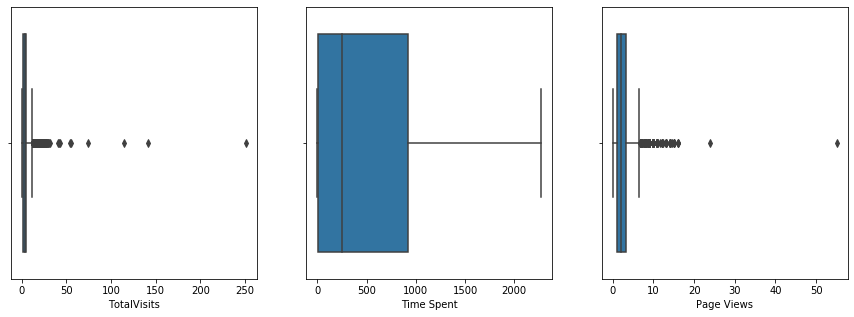

In [21]:
# Checking for outliers for numeric variables

plt.figure(figsize = [15,5])
plt.subplot(1,3,1)
sns.boxplot(lead_df['TotalVisits'])
plt.subplot(1,3,2)
sns.boxplot(lead_df['Time Spent'])
plt.subplot(1,3,3)
sns.boxplot(lead_df['Page Views'])
plt.show()

`Inferences:` Total visits and Page views have outiliers which needs to be treated.

In [22]:
# Handling Outliers using Capping

# Capping Total Visits to 95 percentile
q4 = lead_df['TotalVisits'].quantile(0.95)
lead_df['TotalVisits'][lead_df['TotalVisits'] >= q4] = q4

## Capping Page Views to 95 percentile
q4 = lead_df['Page Views'].quantile(0.95)
lead_df['Page Views'][lead_df['Page Views'] >= q4] = q4

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 <a list of 21 Text xticklabel objects>)

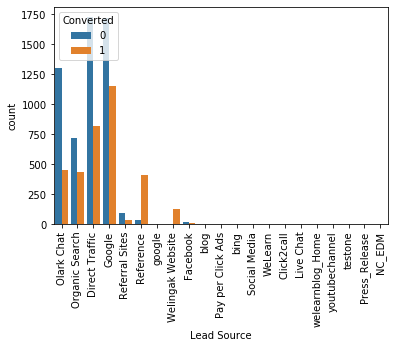

In [23]:
# Lead Source
sns.countplot(x = "Lead Source", hue = "Converted", data = lead_df)
plt.xticks(rotation=90)

`Inferences:` Lead Source are mostly from Google, Direct Traffice, Olark Chat, Organic Search

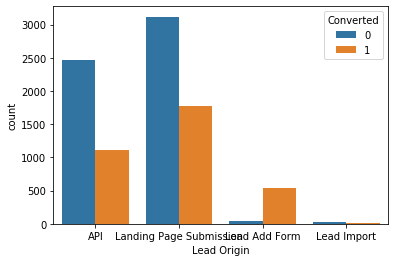

In [24]:
# Lead Origin
sns.countplot(x = "Lead Origin", hue = "Converted", data = lead_df)

`Inferences:` Lead origin are mostly from Landing Page Submission ,API.

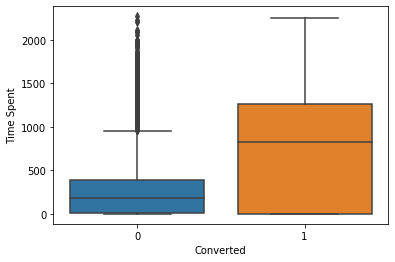

In [25]:
# Time Spent
sns.boxplot(y = 'Time Spent', x = 'Converted', data = lead_df)

`Inferences:` People who spent more time have a high rate of conversion

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90]),
 <a list of 91 Text xticklabel objects>)

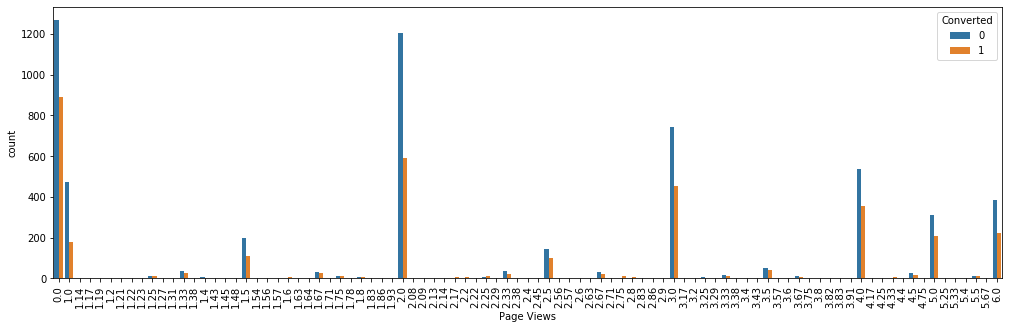

In [26]:
# Page Views
plt.figure(figsize = [17,5])
sns.countplot(x = "Page Views", hue = "Converted", data = lead_df)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 <a list of 19 Text xticklabel objects>)

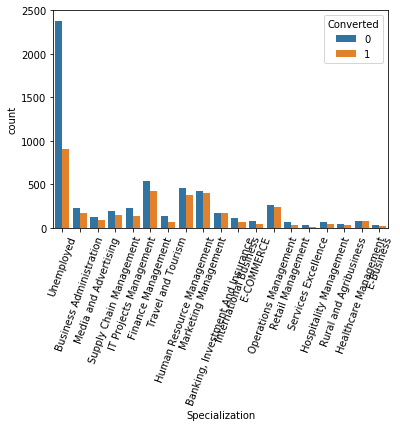

In [27]:
# Specialization
#plt.figure(figsize = [10, 5])
sns.countplot(x = "Specialization", hue = "Converted", data = lead_df)
plt.xticks(rotation=70)

`Inferences:` People from mostly unemployed/student category have higher counts on exploring X education

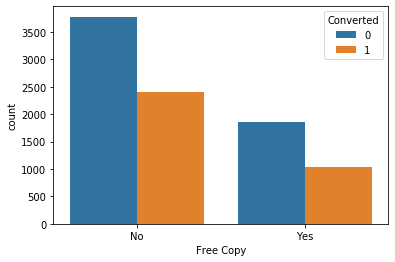

In [28]:
# Free Copy
sns.countplot(x = "Free Copy", hue = "Converted", data = lead_df)

`Inferences:` Although people may not choose the free copy but that is not a deterrent

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

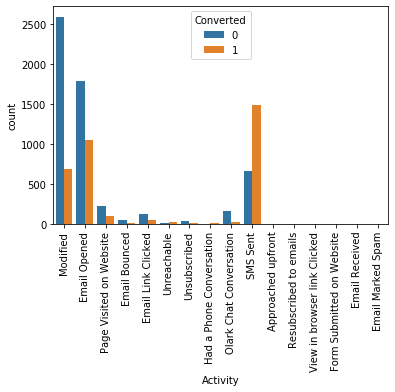

In [29]:
# Activity
sns.countplot(x = "Activity", hue = "Converted", data = lead_df)
plt.xticks(rotation=90)

`Inferences:` Customer with SMS Sent and Email Opened have high rate of conversion

#### Bivariate Analysis

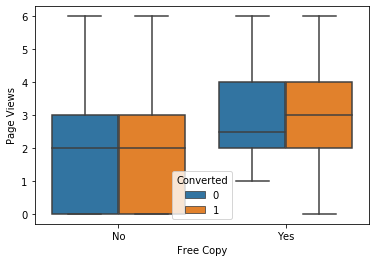

In [30]:
# Free Copy vs Page Views
sns.boxplot(x = 'Free Copy', y = 'Page Views',hue = 'Converted', data = lead_df)
plt.show()

`Inferences:` People with Free Copy and Page views have almost a similiar trend in being converted or not

In [31]:
lead_df['Lead Source'].replace('google','Google', inplace = True)

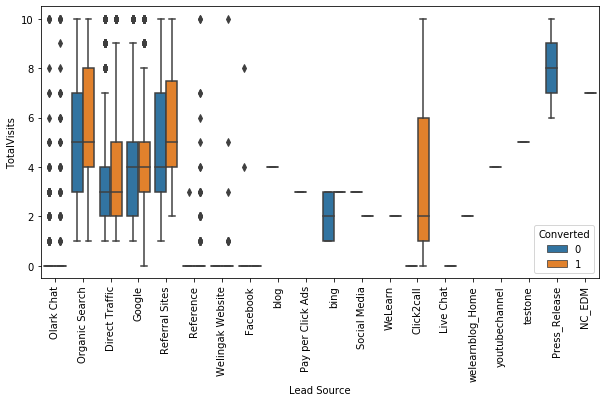

In [32]:
# Lead Source vs TotalVisits
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'Lead Source', y = 'TotalVisits',hue = 'Converted', data = lead_df)
plt.xticks(rotation=90)
plt.show()

`Inferences:` Most conversions are from Organic Search, Click2call, Referral Sites, Direct Traffic and Google lead sources

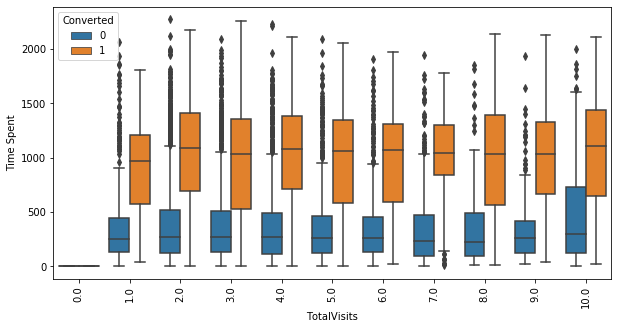

In [33]:
#TotalVisits vs Time Spent 
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'TotalVisits', y = 'Time Spent',hue = 'Converted', data = lead_df)
plt.xticks(rotation=90)
plt.show()

`Inferences:` People who have spent more time irrespective of the Total Visits have higher conversion rate

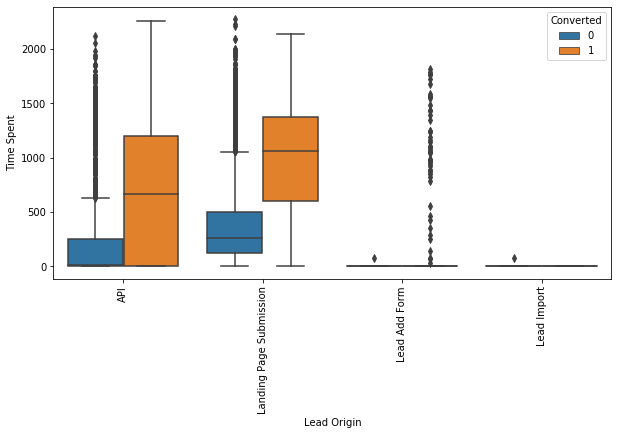

In [34]:
# Lead Origin vs Time Spent
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'Lead Origin', y  = 'Time Spent',hue= 'Converted', data = lead_df)
plt.xticks(rotation=90)
plt.show()

`Inferences:` People who have used API and Landing Page Submission for longer time have higher conversion rate.

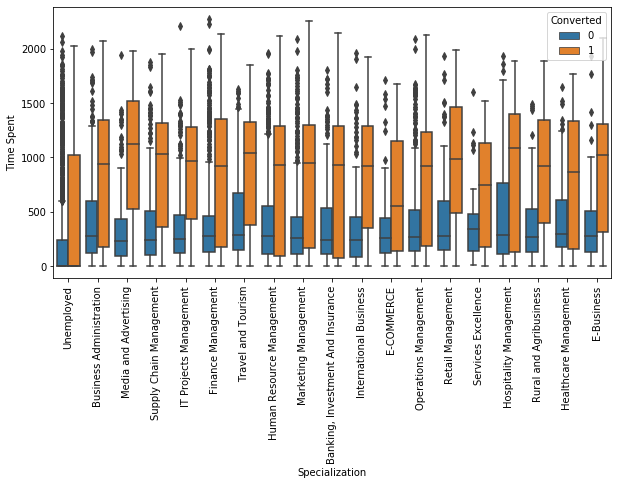

In [35]:
# Specialization vs Time Spent
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'Specialization', y = 'Time Spent',hue = 'Converted', data = lead_df)
plt.xticks(rotation=90)
plt.show()

`Inferences:` People who have spent more time irrespective of the Specialization have higher conversion rate

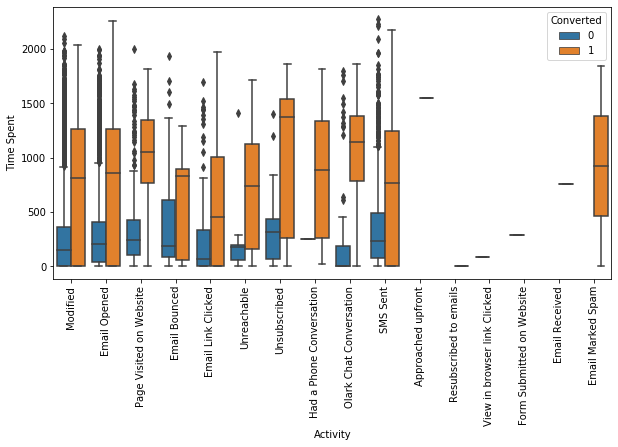

In [36]:
# Activity vs Time Spent
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'Activity', y = 'Time Spent',hue = 'Converted', data = lead_df)
plt.xticks(rotation=90)
plt.show()

`Inferences:` People who have spent more time irrespective of the Activity have higher conversion rate

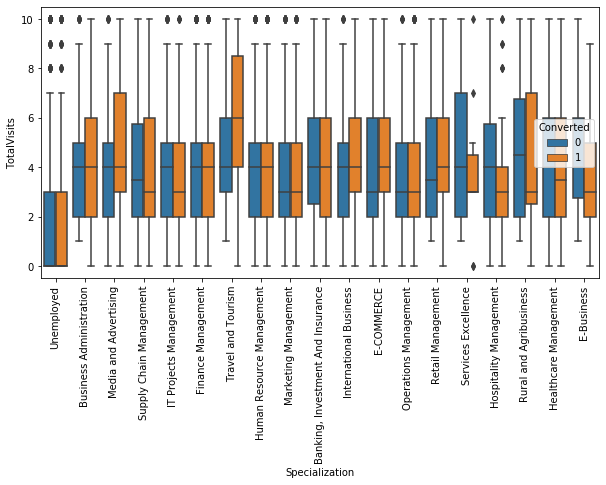

In [37]:
# Specialization vs TotalVisits
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'Specialization', y = 'TotalVisits',hue = 'Converted', data = lead_df)
plt.xticks(rotation=90)
plt.show()

`Inferences:` Total Visits as compared to Specialization have almost similiar rate of conversion adn nor conversion

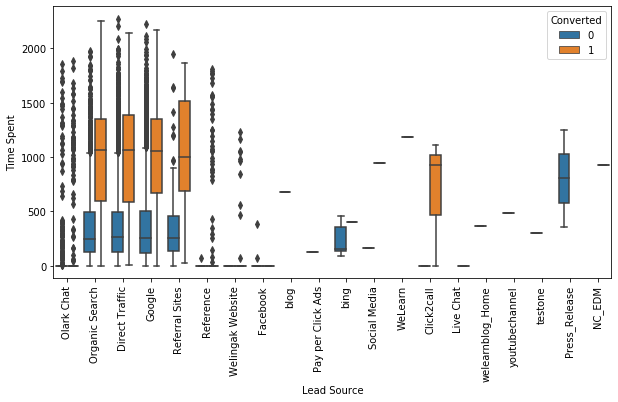

In [38]:
# Lead Source vs Time Spent
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'Lead Source', y = 'Time Spent',hue = 'Converted', data = lead_df)
plt.xticks(rotation=90)
plt.show()

`Inferences:` People who have spent more time irrespective of the Lead Source have higher conversion rate in most cases

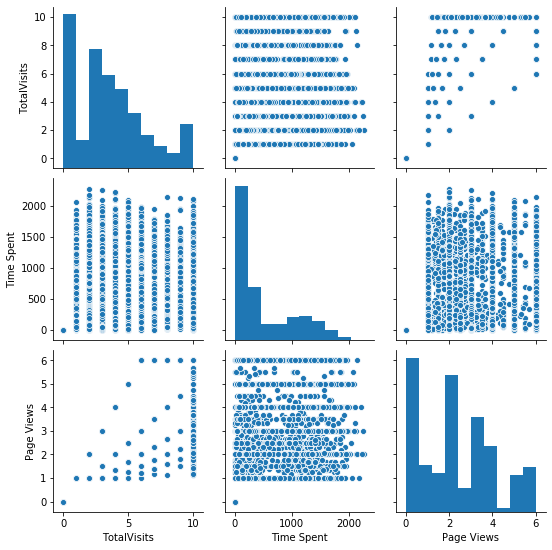

In [39]:
sns.pairplot(lead_df[['TotalVisits','Time Spent','Page Views']])

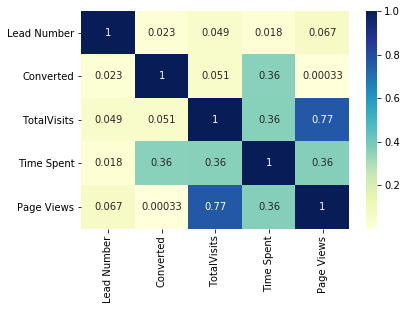

In [40]:
#plt.figure(figsize = (16, 10))
sns.heatmap(lead_df.corr(), annot = True, cmap="YlGnBu")
plt.show()

`Inferences:` It shows from the pairplots and heat map that the variables TotalVisits and Page Views have slightly high correlation of 0.77.

#### Data Preparation

In [41]:
# Converting yes/no to 1/0

lead_df['Free Copy'] = lead_df['Free Copy'].apply(lambda x: 1 if x == 'Yes' else 0)
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Time Spent,Page Views,Specialization,Free Copy,Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0.0,0,0.0,Unemployed,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5.0,674,2.5,Unemployed,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Business Administration,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Media and Advertising,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Unemployed,0,Modified


### Creating dummies for all categorical columns

In [42]:
# variable 'Lead Origin'
lo = pd.get_dummies(lead_df['Lead Origin'], prefix = 'Lead Origin', drop_first = True)

lead_df = pd.concat([lead_df,lo], axis =1)

#Dropping the variable for which  dummies were created
#lead_df.drop('Lead Origin', 1, inplace = True)
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Time Spent,Page Views,Specialization,Free Copy,Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0.0,0,0.0,Unemployed,0,Modified,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5.0,674,2.5,Unemployed,0,Email Opened,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Business Administration,1,Email Opened,1,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Media and Advertising,0,Modified,1,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Unemployed,0,Modified,1,0,0


In [43]:
# Bucketing different levels to 'Other'
lead_df['Lead Source'].replace(['Reference','Welingak Website','Referral Sites','Facebook','bing','Click2call','Live Chat',
                               'Social Media','Press_Release','Pay per Click Ads','NC_EDM','blog','youtubechannel','testone',
                               'WeLearn','welearnblog_Home'],'Other', inplace = True)

In [44]:
# variable 'Lead Source'
ls = pd.get_dummies(lead_df['Lead Source'], prefix = 'Lead Source')

ls = ls.drop('Lead Source_Other', 1)
lead_df = pd.concat([lead_df,ls], axis =1)

#Dropping the variable for which  dummies were created
#lead_df.drop('Lead Source', 1, inplace = True)
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Time Spent,Page Views,Specialization,Free Copy,Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0.0,0,0.0,Unemployed,0,Modified,0,0,0,0,0,1,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5.0,674,2.5,Unemployed,0,Email Opened,0,0,0,0,0,0,1
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Business Administration,1,Email Opened,1,0,0,1,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Media and Advertising,0,Modified,1,0,0,1,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Unemployed,0,Modified,1,0,0,0,1,0,0


In [45]:
lead_df['Specialization'].value_counts()/lead_df.shape[0]

Unemployed                           0.361693
Finance Management                   0.105687
Human Resource Management            0.092242
Marketing Management                 0.090699
Operations Management                0.054992
Business Administration              0.043972
IT Projects Management               0.040335
Supply Chain Management              0.038131
Banking, Investment And Insurance    0.036919
Media and Advertising                0.022261
Travel and Tourism                   0.022261
International Business               0.019396
Healthcare Management                0.017192
Hospitality Management               0.012233
E-COMMERCE                           0.012233
Retail Management                    0.011020
Rural and Agribusiness               0.008045
E-Business                           0.006282
Services Excellence                  0.004408
Name: Specialization, dtype: float64

In [46]:
# Bucketing specialization 
lead_df['Specialization'].replace(['IT Projects Management','Supply Chain Management','Banking, Investment And Insurance',
                                   'Media and Advertising','Travel and Tourism','International Business','Healthcare Management',
                                   'Hospitality Management','E-COMMERCE','Retail Management','Rural and Agribusiness',
                                   'E-Business','Services Excellence'],'Other', inplace = True)
lead_df.Specialization.value_counts()/lead_df.shape[0]

Unemployed                   0.361693
Other                        0.250716
Finance Management           0.105687
Human Resource Management    0.092242
Marketing Management         0.090699
Operations Management        0.054992
Business Administration      0.043972
Name: Specialization, dtype: float64

In [47]:
# variable 'Specialization'
spec = pd.get_dummies(lead_df['Specialization'], prefix = 'Specialization')

spec = spec.drop('Specialization_Other', 1)
lead_df = pd.concat([lead_df,spec], axis =1)

#Dropping the variable for which  dummies were created
#lead_df.drop('Specialization', 1, inplace = True)
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Time Spent,Page Views,Specialization,Free Copy,Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Specialization_Business Administration,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_Marketing Management,Specialization_Operations Management,Specialization_Unemployed
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0.0,0,0.0,Unemployed,0,Modified,0,0,0,0,0,1,0,0,0,0,0,0,1
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5.0,674,2.5,Unemployed,0,Email Opened,0,0,0,0,0,0,1,0,0,0,0,0,1
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Business Administration,1,Email Opened,1,0,0,1,0,0,0,1,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Other,0,Modified,1,0,0,1,0,0,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Unemployed,0,Modified,1,0,0,0,1,0,0,0,0,0,0,0,1


In [48]:
# Bucketing
lead_df['Activity'].replace(['Page Visited on Website','Olark Chat Conversation','Email Link Clicked','Email Bounced',
                                          'Unsubscribed','Unreachable','Had a Phone Conversation','Email Marked Spam',
                                          'Form Submitted on Website','Approached upfront','View in browser link Clicked',
                                          'Email Received','Resubscribed to emails'],'Other', inplace = True)

In [49]:
# variable 'Activity'
lna = pd.get_dummies(lead_df['Activity'], prefix = 'Activity')

lna = lna.drop('Activity_Other', 1)
lead_df = pd.concat([lead_df,lna], axis =1)

lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Time Spent,Page Views,Specialization,Free Copy,Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Specialization_Business Administration,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_Marketing Management,Specialization_Operations Management,Specialization_Unemployed,Activity_Email Opened,Activity_Modified,Activity_SMS Sent
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0.0,0,0.0,Unemployed,0,Modified,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5.0,674,2.5,Unemployed,0,Email Opened,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Business Administration,1,Email Opened,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Other,0,Modified,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Unemployed,0,Modified,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0


In [50]:
#Dropping the variable for which  dummies were created
lead_df.drop(['Lead Origin','Lead Source','Specialization','Activity'], 1, inplace = True)

In [51]:
lead_df.shape

(9074, 23)

###  Model Building
Let's start by splitting our data into a training set and a test set.

#### Perform train-test split

In [52]:
# Putting feature variable to X
X = lead_df.drop(['Converted', 'Prospect ID', 'Lead Number'], axis=1)

X.head()

,TotalVisits,Time Spent,Page Views,Free Copy,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Specialization_Business Administration,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_Marketing Management,Specialization_Operations Management,Specialization_Unemployed,Activity_Email Opened,Activity_Modified,Activity_SMS Sent
0,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0
1,5.0,674,2.5,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0
2,2.0,1532,2.0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
3,1.0,305,1.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,2.0,1428,1.0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0


In [53]:
# Putting response variable to y
y = lead_df['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [54]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

#### Perform Scaling

In [55]:
# Scaling the Train Set
scaler = StandardScaler()

X_train[['TotalVisits', 'Time Spent', 'Page Views']] = scaler.fit_transform(X_train[['TotalVisits', 'Time Spent', 'Page Views']])

X_train.head()

,TotalVisits,Time Spent,Page Views,Free Copy,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Specialization_Business Administration,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_Marketing Management,Specialization_Operations Management,Specialization_Unemployed,Activity_Email Opened,Activity_Modified,Activity_SMS Sent
3009,-0.432779,-0.160255,-0.155018,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
1012,-0.432779,-0.540048,-0.155018,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
9226,-1.150329,-0.888650,-1.265540,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0
4750,-0.432779,1.643304,-0.155018,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
7987,0.643547,2.017593,0.122613,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0


In [56]:
### Checking the Conversion Rate
converted = (sum(lead_df['Converted'])/len(lead_df['Converted'].index))*100
converted

37.85541106458012

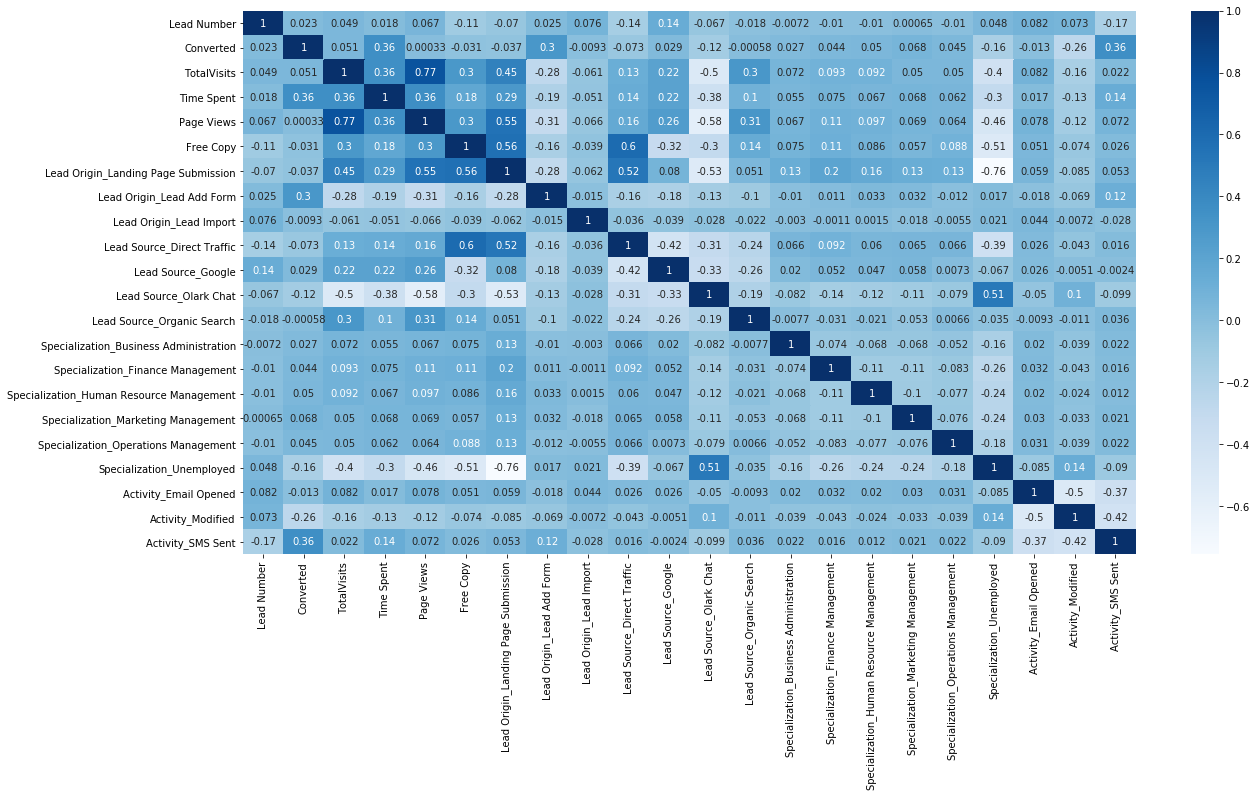

In [57]:
# Let's see the correlation using heatmap
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(lead_df.corr(),annot = True, cmap = 'Blues')
plt.show()

#### Higly correlated dummy variables:

1. Lead Origin_Landing Page Submission and Specialization Unemployes = -0.76
2. Page Views and Total Visists = 0.77

Not dropping these variablesas we want the model to eliminate these variables.


In [58]:
X_train.columns

Index(['TotalVisits', 'Time Spent', 'Page Views', 'Free Copy',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Specialization_Business Administration',
       'Specialization_Finance Management',
       'Specialization_Human Resource Management',
       'Specialization_Marketing Management',
       'Specialization_Operations Management', 'Specialization_Unemployed',
       'Activity_Email Opened', 'Activity_Modified', 'Activity_SMS Sent'],
      dtype='object')

In [59]:
# Building Logistic regression model with the available columns.

logm0 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm0.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2804.6
Date:                Mon, 26 Oct 2020   Deviance:                       5609.3
Time:                        20:05:08   Pearson chi2:                 6.68e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.4385      0.320     -1.370      0.171      -1.066       0.189
TotalVisits                                  0.2895      0.052      5.535      0.000       0.187       0.392
Time Spent                                   1.1140      0.039     28.274      0.000       1.037       1.191
Page Views                                  -0.2744      0.059     -4.618      0.000      -0.391      -0.158
Free Copy                                   -0.2228      0.104     -2.146      0.032      -0.426      -0.019
Lead Origin_Landing Page Submission         -1.0252      0.130     -7.897      0.000      -1.280      -0.771
Lead Origin_Lead Add Form                    4.0260      0.357     11.281      0.000       3.327       4.725
Lead Origin_Lead Import                      1.0504      0.539      1.949      0.051      -0.006       2.107
Lead Source_Direct Traffic                  -0.1925      0.291     -0.662      0.508      -0.763       0.378
Lead Source_Google                           0.0799      0.282      0.283      0.777      -0.473       0.633
Lead Source_Olark Chat                       0.9570      0.302      3.171      0.002       0.366       1.548
Lead Source_Organic Search                  -0.0551      0.291     -0.190      0.849      -0.625       0.514
Specialization_Business Administration      -0.0543      0.175     -0.310      0.757      -0.398       0.289
Specialization_Finance Management            0.1029      0.122      0.846      0.397      -0.135       0.341
Specialization_Human Resource Management     0.0672      0.125      0.540      0.589      -0.177       0.311
Specialization_Marketing Management          0.2100      0.126      1.661      0.097      -0.038       0.458
Specialization_Operations Management         0.1137      0.156      0.730      0.465      -0.192       0.419
Specialization_Unemployed                   -1.3696      0.135    -10.139      0.000      -1.634      -1.105
Activity_Email Opened                        0.5248      0.128      4.115      0.000       0.275       0.775
Activity_Modified                           -0.2902      0.131     -2.220      0.026      -0.546      -0.034
Activity_SMS Sent                            1.9034      0.133     14.276      0.000       1.642       2.165
============================================================================================================
"""

### Feature Selection Using RFE

In [60]:
# Selecting Variables using RFE
logreg = LogisticRegression()

# Running RFE with 15 variables as output
rfe = RFE(logreg, 15)            
rfe = rfe.fit(X_train, y_train)

In [61]:
rfe.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False, False, False, False,  True,  True,
        True,  True])

In [62]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Time Spent', True, 1),
 ('Page Views', True, 1),
 ('Free Copy', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', True, 1),
 ('Specialization_Business Administration', False, 6),
 ('Specialization_Finance Management', False, 4),
 ('Specialization_Human Resource Management', False, 5),
 ('Specialization_Marketing Management', False, 2),
 ('Specialization_Operations Management', False, 3),
 ('Specialization_Unemployed', True, 1),
 ('Activity_Email Opened', True, 1),
 ('Activity_Modified', True, 1),
 ('Activity_SMS Sent', True, 1)]

In [63]:
col = X_train.columns[rfe.support_]
col

Index(['TotalVisits', 'Time Spent', 'Page Views', 'Free Copy',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Specialization_Unemployed',
       'Activity_Email Opened', 'Activity_Modified', 'Activity_SMS Sent'],
      dtype='object')

In [64]:
X_train.columns[~rfe.support_]

Index(['Specialization_Business Administration',
       'Specialization_Finance Management',
       'Specialization_Human Resource Management',
       'Specialization_Marketing Management',
       'Specialization_Operations Management'],
      dtype='object')

### Assessing the model with StatsModels

In [65]:
# Building model for the columns selected by RFE (15 columns)
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())

# Model Fit
res = logm1.fit()

# Summary
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2806.4
Date:                Mon, 26 Oct 2020   Deviance:                       5612.8
Time:                        20:05:09   Pearson chi2:                 6.68e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -0.3662      0.315     -1.162      0.245      -0.984       0.251
TotalVisits                             0.2866      0.052      5.489      0.000       0.184       0.389
Time Spent                              1.1143      0.039     28.295      0.000       1.037       1.191
Page Views                             -0.2752      0.059     -4.640      0.000      -0.392      -0.159
Free Copy                              -0.2335      0.103     -2.257      0.024      -0.436      -0.031
Lead Origin_Landing Page Submission    -1.0342      0.129     -7.989      0.000      -1.288      -0.781
Lead Origin_Lead Add Form               4.0222      0.357     11.282      0.000       3.324       4.721
Lead Origin_Lead Import                 1.0258      0.539      1.903      0.057      -0.031       2.082
Lead Source_Direct Traffic             -0.1874      0.291     -0.645      0.519      -0.757       0.382
Lead Source_Google                      0.0870      0.282      0.309      0.758      -0.465       0.639
Lead Source_Olark Chat                  0.9537      0.301      3.164      0.002       0.363       1.545
Lead Source_Organic Search             -0.0654      0.290     -0.226      0.822      -0.634       0.503
Specialization_Unemployed              -1.4451      0.123    -11.724      0.000      -1.687      -1.203
Activity_Email Opened                   0.5299      0.127      4.157      0.000       0.280       0.780
Activity_Modified                      -0.2876      0.131     -2.200      0.028      -0.544      -0.031
Activity_SMS Sent                       1.9028      0.133     14.277      0.000       1.642       2.164
=======================================================================================================
"""

### Checking for VIF's

In [66]:
X_train[col].columns

Index(['TotalVisits', 'Time Spent', 'Page Views', 'Free Copy',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Specialization_Unemployed',
       'Activity_Email Opened', 'Activity_Modified', 'Activity_SMS Sent'],
      dtype='object')

In [67]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Lead Origin_Landing Page Submission,7.52
7,Lead Source_Direct Traffic,7.32
8,Lead Source_Google,6.13
13,Activity_Modified,4.61
9,Lead Source_Olark Chat,4.23
12,Activity_Email Opened,4.03
11,Specialization_Unemployed,3.90
14,Activity_SMS Sent,3.57
10,Lead Source_Organic Search,3.39
2,Page Views,3.36


In [68]:
# Dropping 'Lead Source_Organic Search' p-value = 0.822
col = col.drop('Lead Source_Organic Search', 1)

In [69]:
# Let's re-run the model using the selected variables - Model 2
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())

# Model Fit & Summary
res = logm2.fit()

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2806.4
Date:                Mon, 26 Oct 2020   Deviance:                       5612.9
Time:                        20:05:10   Pearson chi2:                 6.69e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -0.4231      0.189     -2.237      0.025      -0.794      -0.052
TotalVisits                             0.2867      0.052      5.489      0.000       0.184       0.389
Time Spent                              1.1142      0.039     28.295      0.000       1.037       1.191
Page Views                             -0.2753      0.059     -4.641      0.000      -0.392      -0.159
Free Copy                              -0.2351      0.103     -2.278      0.023      -0.437      -0.033
Lead Origin_Landing Page Submission    -1.0351      0.129     -7.998      0.000      -1.289      -0.781
Lead Origin_Lead Add Form               4.0791      0.252     16.161      0.000       3.584       4.574
Lead Origin_Lead Import                 1.0827      0.476      2.273      0.023       0.149       2.016
Lead Source_Direct Traffic             -0.1278      0.121     -1.054      0.292      -0.365       0.110
Lead Source_Google                      0.1450      0.115      1.259      0.208      -0.081       0.371
Lead Source_Olark Chat                  1.0106      0.166      6.101      0.000       0.686       1.335
Specialization_Unemployed              -1.4446      0.123    -11.721      0.000      -1.686      -1.203
Activity_Email Opened                   0.5295      0.127      4.155      0.000       0.280       0.779
Activity_Modified                      -0.2878      0.131     -2.202      0.028      -0.544      -0.032
Activity_SMS Sent                       1.9016      0.133     14.280      0.000       1.641       2.163
=======================================================================================================
"""

In [70]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Lead Origin_Landing Page Submission,6.32
12,Activity_Modified,3.53
7,Lead Source_Direct Traffic,3.40
2,Page Views,3.35
11,Activity_Email Opened,3.15
9,Lead Source_Olark Chat,3.14
10,Specialization_Unemployed,3.08
3,Free Copy,2.94
8,Lead Source_Google,2.92
13,Activity_SMS Sent,2.80


In [71]:
# Dropping 'Lead Source_Direct Traffic' p-value = 0.298
col = col.drop('Lead Source_Direct Traffic', 1)

In [72]:
# Let's re-run the model using the selected variables - Model 3
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())

# Model Fit & Summary
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2807.0
Date:                Mon, 26 Oct 2020   Deviance:                       5614.0
Time:                        20:05:11   Pearson chi2:                 6.69e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -0.4867      0.179     -2.714      0.007      -0.838      -0.135
TotalVisits                             0.2943      0.052      5.692      0.000       0.193       0.396
Time Spent                              1.1135      0.039     28.285      0.000       1.036       1.191
Page Views                             -0.2640      0.058     -4.528      0.000      -0.378      -0.150
Free Copy                              -0.2510      0.102     -2.459      0.014      -0.451      -0.051
Lead Origin_Landing Page Submission    -1.0624      0.127     -8.381      0.000      -1.311      -0.814
Lead Origin_Lead Add Form               4.1583      0.241     17.242      0.000       3.686       4.631
Lead Origin_Lead Import                 1.1614      0.471      2.468      0.014       0.239       2.084
Lead Source_Google                      0.2158      0.094      2.301      0.021       0.032       0.400
Lead Source_Olark Chat                  1.0880      0.149      7.309      0.000       0.796       1.380
Specialization_Unemployed              -1.4386      0.123    -11.694      0.000      -1.680      -1.197
Activity_Email Opened                   0.5315      0.127      4.171      0.000       0.282       0.781
Activity_Modified                      -0.2843      0.131     -2.177      0.030      -0.540      -0.028
Activity_SMS Sent                       1.9049      0.133     14.312      0.000       1.644       2.166
=======================================================================================================
"""

In [73]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Lead Origin_Landing Page Submission,5.07
11,Activity_Modified,3.43
2,Page Views,3.24
10,Activity_Email Opened,3.03
9,Specialization_Unemployed,2.97
3,Free Copy,2.77
8,Lead Source_Olark Chat,2.73
12,Activity_SMS Sent,2.72
0,TotalVisits,2.58
7,Lead Source_Google,2.16


In [74]:
# Dropping 'Lead Source_Google' p-value = 0.021

col = col.drop('Lead Source_Google', 1)

# Let's re-run the model using the selected variables - Model 4
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())

# Model Fit & Summary
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2809.6
Date:                Mon, 26 Oct 2020   Deviance:                       5619.3
Time:                        20:05:11   Pearson chi2:                 6.68e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -0.3168      0.163     -1.940      0.052      -0.637       0.003
TotalVisits                             0.2958      0.052      5.725      0.000       0.195       0.397
Time Spent                              1.1149      0.039     28.342      0.000       1.038       1.192
Page Views                             -0.2676      0.058     -4.594      0.000      -0.382      -0.153
Free Copy                              -0.3794      0.085     -4.448      0.000      -0.547      -0.212
Lead Origin_Landing Page Submission    -1.0820      0.126     -8.558      0.000      -1.330      -0.834
Lead Origin_Lead Add Form               4.0107      0.232     17.272      0.000       3.556       4.466
Lead Origin_Lead Import                 0.9992      0.466      2.144      0.032       0.086       1.913
Lead Source_Olark Chat                  0.9500      0.136      7.003      0.000       0.684       1.216
Specialization_Unemployed              -1.4763      0.122    -12.103      0.000      -1.715      -1.237
Activity_Email Opened                   0.5381      0.127      4.223      0.000       0.288       0.788
Activity_Modified                      -0.2834      0.131     -2.168      0.030      -0.540      -0.027
Activity_SMS Sent                       1.9040      0.133     14.304      0.000       1.643       2.165
=======================================================================================================
"""

In [75]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Lead Origin_Landing Page Submission,4.83
2,Page Views,3.24
10,Activity_Modified,3.06
8,Specialization_Unemployed,2.91
9,Activity_Email Opened,2.67
0,TotalVisits,2.56
7,Lead Source_Olark Chat,2.53
11,Activity_SMS Sent,2.48
3,Free Copy,2.19
5,Lead Origin_Lead Add Form,1.61


In [76]:
# Dropping 'Lead Origin_Lead Import' p-value = 0.032
col = col.drop('Lead Origin_Lead Import', 1)

# Let's re-run the model using the selected variables - Model 5
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())

# Model Fit & Summary
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6339
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2811.8
Date:                Mon, 26 Oct 2020   Deviance:                       5623.6
Time:                        20:05:11   Pearson chi2:                 6.68e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -0.2685      0.162     -1.659      0.097      -0.586       0.049
TotalVisits                             0.2901      0.052      5.630      0.000       0.189       0.391
Time Spent                              1.1072      0.039     28.326      0.000       1.031       1.184
Page Views                             -0.2772      0.058     -4.773      0.000      -0.391      -0.163
Free Copy                              -0.3835      0.085     -4.503      0.000      -0.550      -0.217
Lead Origin_Landing Page Submission    -1.1191      0.125     -8.917      0.000      -1.365      -0.873
Lead Origin_Lead Add Form               3.9550      0.231     17.146      0.000       3.503       4.407
Lead Source_Olark Chat                  0.9012      0.133      6.752      0.000       0.640       1.163
Specialization_Unemployed              -1.5056      0.122    -12.373      0.000      -1.744      -1.267
Activity_Email Opened                   0.5454      0.127      4.285      0.000       0.296       0.795
Activity_Modified                      -0.2840      0.131     -2.175      0.030      -0.540      -0.028
Activity_SMS Sent                       1.9033      0.133     14.309      0.000       1.643       2.164
=======================================================================================================
"""

In [77]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Lead Origin_Landing Page Submission,4.81
2,Page Views,3.22
9,Activity_Modified,3.04
7,Specialization_Unemployed,2.91
8,Activity_Email Opened,2.62
0,TotalVisits,2.56
6,Lead Source_Olark Chat,2.49
10,Activity_SMS Sent,2.46
3,Free Copy,2.19
5,Lead Origin_Lead Add Form,1.59


In [78]:
# Dropping Activity_Modified, p-value = 0.03
col = col.drop('Activity_Modified', 1)

# Let's re-run the model using the selected variables - Model 6
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())

# Model Fit & Summary
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6340
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2814.1
Date:                Mon, 26 Oct 2020   Deviance:                       5628.2
Time:                        20:05:11   Pearson chi2:                 6.67e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -0.4962      0.124     -4.002      0.000      -0.739      -0.253
TotalVisits                             0.3137      0.051      6.209      0.000       0.215       0.413
Time Spent                              1.1076      0.039     28.356      0.000       1.031       1.184
Page Views                             -0.2902      0.058     -5.017      0.000      -0.404      -0.177
Free Copy                              -0.3820      0.085     -4.486      0.000      -0.549      -0.215
Lead Origin_Landing Page Submission    -1.1164      0.125     -8.899      0.000      -1.362      -0.871
Lead Origin_Lead Add Form               3.9593      0.230     17.183      0.000       3.508       4.411
Lead Source_Olark Chat                  0.9177      0.133      6.893      0.000       0.657       1.179
Specialization_Unemployed              -1.5037      0.122    -12.365      0.000      -1.742      -1.265
Activity_Email Opened                   0.7653      0.079      9.709      0.000       0.611       0.920
Activity_SMS Sent                       2.1262      0.086     24.605      0.000       1.957       2.296
=======================================================================================================
"""

In [79]:
### Extracting the res.summary to a dataframe

df = pd.read_html(res.summary().tables[1].as_html(),header=0,index_col=0)[0]
df

,coef,std err,z,P>|z|,[0.025,0.975]
const,-0.4962,0.124,-4.002,0.0,-0.739,-0.253
TotalVisits,0.3137,0.051,6.209,0.0,0.215,0.413
Time Spent,1.1076,0.039,28.356,0.0,1.031,1.184
Page Views,-0.2902,0.058,-5.017,0.0,-0.404,-0.177
Free Copy,-0.3820,0.085,-4.486,0.0,-0.549,-0.215
Lead Origin_Landing Page Submission,-1.1164,0.125,-8.899,0.0,-1.362,-0.871
Lead Origin_Lead Add Form,3.9593,0.230,17.183,0.0,3.508,4.411
Lead Source_Olark Chat,0.9177,0.133,6.893,0.0,0.657,1.179
Specialization_Unemployed,-1.5037,0.122,-12.365,0.0,-1.742,-1.265
Activity_Email Opened,0.7653,0.079,9.709,0.0,0.611,0.920


In [80]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views,3.20
4,Lead Origin_Landing Page Submission,2.94
0,TotalVisits,2.54
6,Lead Source_Olark Chat,2.40
3,Free Copy,2.18
7,Specialization_Unemployed,1.89
8,Activity_Email Opened,1.57
9,Activity_SMS Sent,1.56
5,Lead Origin_Lead Add Form,1.46
1,Time Spent,1.30


All variables are having good p-value and VIF value so no need of dropping any columns and predictions can be made based on Model 6.

In [81]:
# Storing the predictions of train set to y_train_pred
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred

array([0.18279356, 0.02176958, 0.1130437 , ..., 0.95721108, 0.24317982,
       0.26334951])

In [82]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,ID
0,0,0.182794,3009
1,0,0.021770,1012
2,0,0.113044,9226
3,1,0.904028,4750
4,1,0.687452,7987


#### Creating a dataframe with the actual converted flag and the predicted probabilities

In [83]:
# Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,ID,predicted
0,0,0.182794,3009,0
1,0,0.021770,1012,0
2,0,0.113044,9226,0
3,1,0.904028,4750,1
4,1,0.687452,7987,1


In [84]:
# Let's take a look at the confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3419,  486],
       [ 774, 1672]], dtype=int64)

In [85]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8016060462919226

In [86]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6835650040883074

In [87]:
# Specificity/True Negative Rate
TN / float(TN+FP)

0.8755441741357234

Though the accuracy of the model is around 80% but the specificity of the model is 68% which is low considering the probability cut off as 0.5. So we need to find the optimal cut off so that the sensitivity of the model can be increased above 80%.

#### Plotting the ROC Curve

In [88]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [89]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

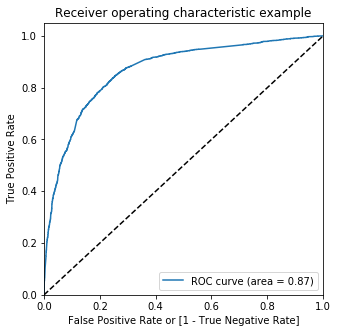

In [90]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

#### Optimal Cut off

In [91]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.182794,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.021770,1012,0,1,0,0,0,0,0,0,0,0,0
2,0,0.113044,9226,0,1,1,0,0,0,0,0,0,0,0
3,1,0.904028,4750,1,1,1,1,1,1,1,1,1,1,1
4,1,0.687452,7987,1,1,1,1,1,1,1,1,0,0,0


In [92]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.529051  0.970973  0.252241
0.2   0.2  0.734058  0.912101  0.622535
0.3   0.3  0.784443  0.839738  0.749808
0.4   0.4  0.798142  0.762469  0.820487
0.5   0.5  0.801606  0.683565  0.875544
0.6   0.6  0.780507  0.560916  0.918054
0.7   0.7  0.767281  0.482420  0.945711
0.8   0.8  0.739726  0.376124  0.967478
0.9   0.9  0.696111  0.233851  0.985659


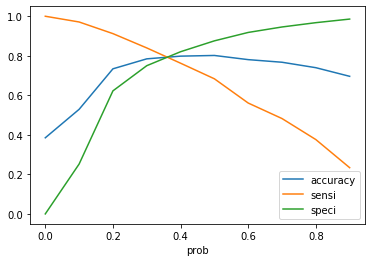

In [93]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

**As we need True Positive Rate or Sensitivity or Conversion Rate to be more than 80%, the probability cut off therefore chosen is 0.3.**

In [94]:
# Creating 'Final_Predicted' column by considering the optimal probabilty cut off ie., 0.3
y_train_pred_final['Final_Predicted'] = y_train_pred_final['Converted_Prob'].map(lambda x: 1 if x > 0.3 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Predicted
0,0,0.182794,3009,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.021770,1012,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.113044,9226,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.904028,4750,1,1,1,1,1,1,1,1,1,1,1,1
4,1,0.687452,7987,1,1,1,1,1,1,1,1,0,0,0,1


#### Lead Score

In [95]:
# Calculating the Lead Score
y_train_pred_final['Lead Score'] = round(y_train_pred_final['Converted_Prob'] * 100,2)
y_train_pred_final.head()

,Converted,Converted_Prob,ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Predicted,Lead Score
0,0,0.182794,3009,0,1,1,0,0,0,0,0,0,0,0,0,18.28
1,0,0.021770,1012,0,1,0,0,0,0,0,0,0,0,0,0,2.18
2,0,0.113044,9226,0,1,1,0,0,0,0,0,0,0,0,0,11.30
3,1,0.904028,4750,1,1,1,1,1,1,1,1,1,1,1,1,90.40
4,1,0.687452,7987,1,1,1,1,1,1,1,1,0,0,0,1,68.75


In [96]:
# Accuracy of the model
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted)

0.7844433947409857

In [97]:
final_confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted)
final_confusion

array([[2928,  977],
       [ 392, 2054]], dtype=int64)

In [98]:
TP = final_confusion[1,1]
TN = final_confusion[0,0]
FP = final_confusion[0,1]
FN = final_confusion[1,0]

# Sensitivity of the Logistic Regression Model
TP / float(TP+FN)

0.8397383483237939

In [99]:
# Specificity/True Negative Rate
TN / float(TN+FP)

0.7498079385403329

In [100]:
# Precision and Recall for Train Set
print(precision_score(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted))
print(recall_score(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted))

0.6776641372484329
0.8397383483237939


In [101]:
# False Positive rate
FP / float(TN+FP)

0.2501920614596671

For  the train test, both the views ie., Sensitivity- Specificity View and Precision-Recall view is having (cut off = 0.3)
- Accuracy = 78.44%
- Sensitivity = Recall = 83.97%
- Specificity = 74.98%
- Precision = 67.76%

### Making Predictions on test Set

In [102]:
X_test.head()

,TotalVisits,Time Spent,Page Views,Free Copy,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Specialization_Business Administration,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_Marketing Management,Specialization_Operations Management,Specialization_Unemployed,Activity_Email Opened,Activity_Modified,Activity_SMS Sent
3271,4.0,157,4.0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0
1490,5.0,1513,5.0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
7936,2.0,74,2.0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0
4216,0.0,0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3830,8.0,164,6.0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [103]:
# Scaling the Test Set
X_test[['TotalVisits','Time Spent','Page Views']] = scaler.transform(X_test[['TotalVisits','Time Spent','Page Views']])
X_test.head()

,TotalVisits,Time Spent,Page Views,Free Copy,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Specialization_Business Administration,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_Marketing Management,Specialization_Operations Management,Specialization_Unemployed,Activity_Email Opened,Activity_Modified,Activity_SMS Sent
3271,0.284772,-0.600595,0.955505,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0
1490,0.643547,1.887326,1.510766,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
7936,-0.432779,-0.752879,-0.155018,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0
4216,-1.150329,-0.888650,-1.265540,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3830,1.719873,-0.587751,2.066027,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [104]:
# Selecting columns that were used in train set
X_test = X_test[col]
X_test.head()

,TotalVisits,Time Spent,Page Views,Free Copy,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Specialization_Unemployed,Activity_Email Opened,Activity_SMS Sent
3271,0.284772,-0.600595,0.955505,0,0,0,0,1,1,0
1490,0.643547,1.887326,1.510766,1,1,0,0,0,1,0
7936,-0.432779,-0.752879,-0.155018,0,0,0,0,1,1,0
4216,-1.150329,-0.888650,-1.265540,0,0,1,0,0,0,0
3830,1.719873,-0.587751,2.066027,1,1,0,0,0,1,0


In [105]:
# Adding constant
X_test_sm = sm.add_constant(X_test)

In [106]:
# Storing the predictions of test set to y_test_pred
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

3271    0.110298
1490    0.651249
7936    0.103475
4216    0.923103
3830    0.125617
1800    0.185600
6507    0.413887
4821    0.285286
4223    0.957211
4714    0.113044
dtype: float64

In [107]:
# Converting y_test_pred to a dataframe
y_pred = pd.DataFrame(y_test_pred)
y_pred.head()

,0
3271,0.110298
1490,0.651249
7936,0.103475
4216,0.923103
3830,0.125617


In [108]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Adding Lead Number to y_test_df
y_test_df['Lead Number'] = lead_df.loc[y_test.index,'Lead Number']
y_test_df.head()

,Converted,Lead Number
3271,0,628652
1490,1,644500
7936,0,588935
4216,1,619437
3830,0,623381


In [109]:
# Removing the index to append them side by side
y_pred.reset_index(drop = True, inplace = True)
y_test_df.reset_index(drop = True, inplace = True)

In [110]:
# Append both dataframes
y_pred_final = pd.concat([y_test_df, y_pred], axis = 1)
y_pred_final.head()

,Converted,Lead Number,0
0,0,628652,0.110298
1,1,644500,0.651249
2,0,588935,0.103475
3,1,619437,0.923103
4,0,623381,0.125617


In [111]:
# Renaming the column
y_pred_final = y_pred_final.rename(columns={0: 'Converted_Prob'})
y_pred_final.head()

,Converted,Lead Number,Converted_Prob
0,0,628652,0.110298
1,1,644500,0.651249
2,0,588935,0.103475
3,1,619437,0.923103
4,0,623381,0.125617


In [112]:
# Creating the 'Final_Predicted' column by considering the optimal cut off as 0.3
y_pred_final['Final_Predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.3 else 0)

y_pred_final.head()

,Converted,Lead Number,Converted_Prob,Final_Predicted
0,0,628652,0.110298,0
1,1,644500,0.651249,1
2,0,588935,0.103475,0
3,1,619437,0.923103,1
4,0,623381,0.125617,0


#### Lead Score 

In [113]:
# Caluculating the lead score
y_pred_final['Lead Score'] = round(y_pred_final['Converted_Prob'] * 100,2)
y_pred_final.head()

,Converted,Lead Number,Converted_Prob,Final_Predicted,Lead Score
0,0,628652,0.110298,0,11.03
1,1,644500,0.651249,1,65.12
2,0,588935,0.103475,0,10.35
3,1,619437,0.923103,1,92.31
4,0,623381,0.125617,0,12.56


In [114]:
# Accuracy
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.Final_Predicted)

0.7756151303709145

In [115]:
confusion = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.Final_Predicted)
confusion

array([[1297,  437],
       [ 174,  815]], dtype=int64)

In [116]:
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

# Sensitivity of the Logistic Regression Model
TP / float(TP+FN)

0.8240647118301314

In [117]:
# Specificity
TN / float(TN+FP)

0.7479815455594002

In [118]:
# False Positive rate
FP / float(TN+FP)

0.2520184544405998

In [119]:
y_pred_final.head()

,Converted,Lead Number,Converted_Prob,Final_Predicted,Lead Score
0,0,628652,0.110298,0,11.03
1,1,644500,0.651249,1,65.12
2,0,588935,0.103475,0,10.35
3,1,619437,0.923103,1,92.31
4,0,623381,0.125617,0,12.56


### Precision and Recall

In [120]:
confusion = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.Final_Predicted )
confusion

array([[1297,  437],
       [ 174,  815]], dtype=int64)

In [121]:
##### Precision
##TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.6509584664536742

In [122]:
##Recall
##TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8240647118301314

#### Using sklearn utilities for the same

In [123]:
# Test Set
print(precision_score(y_pred_final.Converted, y_pred_final.Final_Predicted))
print(recall_score(y_pred_final.Converted, y_pred_final.Final_Predicted))

0.6509584664536742
0.8240647118301314


## Precision and recall tradeoff

In [124]:
from sklearn.metrics import precision_recall_curve

In [125]:
#Training set
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    0
 6348    1
 6349    0
 6350    0
 Name: predicted, Length: 6351, dtype: int64)

In [126]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

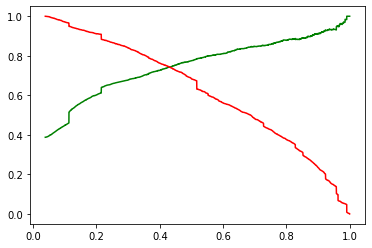

In [127]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

For  the test set, both the views ie., Sensitivity- Specificity View and Precision-Recall view is having 
- Accuracy = 77.56%
- Sensitivity = Recall = 82.4%
- Specificity = 74.79%
- Precision = 65.09%

Converted = 0.31 * TotalVisits + 1.1 * Time Spent - 0.29 * Page Views - 0.38 * Free Copy - 1.12 * Lead Origin_Landing Page Submission + 3.96 * Lead Origin_Lead Add Form + 0.92 * Lead Source_Olark Chat - 1.5 * Specialization_Unemployed + 0.77 * Activity_Email Opened + 2.13 * Activity_SMS Sent

**`Final Conclusion :`**
- From  the above two views i.e., Sensitivity-Specificity View and Precision-Recall View, Sensitivity-Specificity View are giving better results for the final model(model 6) created, with the sensitivity=recall= 0.83.
- Top 3 Variables responsible for conversion rate:
    1. Lead Origin_Landing Page Submission
    2. Activity_SMS Sent
    3. Specialization_Unemployed